<a href="https://colab.research.google.com/github/alaqsaka/university-related/blob/PrakDataMining/pertemuan_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MODUL : Naive Bayes

Memahami salah metode dalam pengklasifikasian data merupakan bagian dari proses data mining. 
Kegiatan belajar ini akan mempelajari penggunaan salah satu metode klasifikasi
data pada python menggunakan library sklearn.

Naïve Bayes Classifier
• Adalah metode classifier yang berdasarkan probabilitas dan teorema bayesian dengan asumsi bahwa setiap variable X bersifat bebas (independence)
• Dikatakan “naïve” karena menerapkan asumsi bahwa semua variabel bersifat independen, yaitu tidak adanya kaitan sebuah variabel dengan variabel yang lain. Padahal kenyataannya, kita jarang sekali menemukan kasus dimana variabel - variabelnya tidak berkaitan.

Pada kegiatan ini, kita akan memanfaatkan library scikit-learn : https://scikit-learn.org/stable/modules/naive_bayes.html. Bila Anda ingin menggunakan library ini, sangat penting untuk membaca manual dr library tsb.

Mari kita terapkan naive bayes pada kelas teori lalu menggunakan data Bermain Tenis

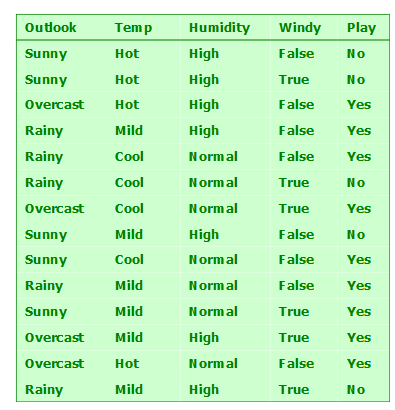

Mari buat dataset tersebut ke dalam python:

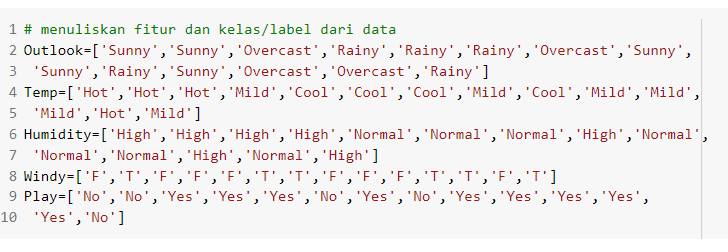

In [ ]:
#tulis code disini
Outlook = ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy']
Temp = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High']
Windy = ['F', 'T', 'F', 'F', 'F', 'T', 'T', 'F', 'F', 'F', 'T', 'T', 'F', 'T']
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

Menggabungkan Fitur tersebut agar menjadi satu data frame 

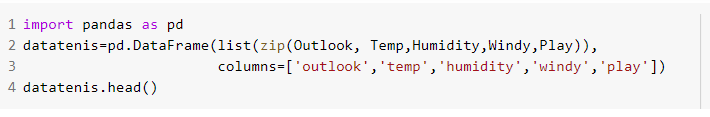

In [ ]:
#tulis code disini

tampilannya akan speerti ini:

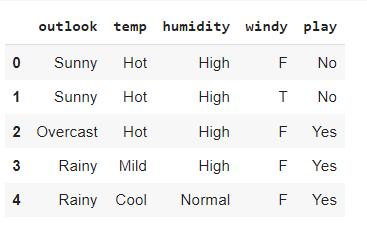

Naive bayes memerlukan input berupa numerik. sehingga kita akan mengubah/ mempraproses data kita ke dalam numerik. selain menggunakan one-hot encoder (dummy_variables), kita juga dapat menggunakan <code> LabelEncoder</code>. LabelEncoder ini mengubah fitur kategorikal string ke dalam numerik berdasarkan URUTAN. 

Misal : 
outlook berisi nilai Sunny, Overcast, dan Rainy. 

LabelEncoder akan mengurutkannya menjadi :

* Overcast:0

* Rainy :1

* Sunny :2

karena fitur kita berbentuk kategorikal sehingga kita akan menggunakan teknik ini


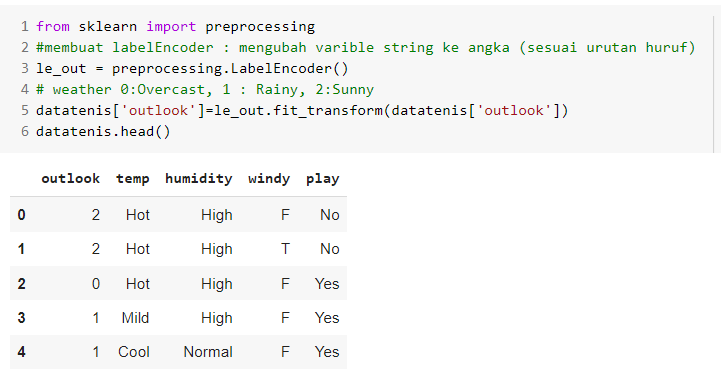

Terapkan ke fitur lainnya

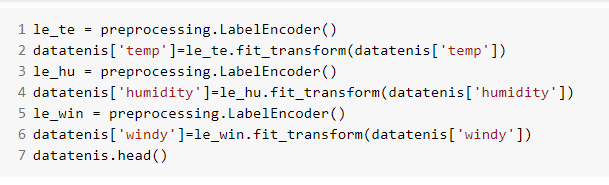

In [ ]:
# tulis code disini

Karena Naïve bayes yang akan kita terapkan berbentuk kategorikal (sunny, overcast, rainy, high, normal, dst), maka kita akan menerapkan multinomial naïve bayes.

Note: cek https://scikit-learn.org/stable/modules/naive_bayes.html beserta paper-paper yang mendasarinya dalam halaman tersebut


Mari kita jalankan pelatihan (pembuatan model) dengan naïve bayes. yakni dengan membuat objek naive bayes lalu melatihnya dengan data

In [ ]:
from sklearn.naive_bayes import MultinomialNB

#buat objek model Naive Bayes
model = MultinomialNB()

Objek tersebut kita latih dengan data. yakni memberikan fitur sebagai input latihan, kelas sebagi prediksinya (ingat ini adalah klasifikasi/supervised learning).

In [ ]:
#Latih dengan data
model.fit(datatenis[['outlook','temp','humidity','windy']], datatenis['play'])

Mari kita tes dengan data:

* Misal kita ujikan data tes X dengan kondisi, X = Outlook :Sunny, Temp : mild,
Humidity : normal, Windy : false}
* Mari kita prediksikan kelasnya, apakah dalam kondisi tersebut seseorang akan
bermain (play:yes) atau tidak (play:no)? 

untuk memprediksi kita guankan perintah <code>.predict()</code>

In [ ]:
predicted = model.predict([[2,2,1,0]])
print ("Predicted Value:", predicted)

Untuk dapat melihat probabilitas masing-masing kelas, dapat digunakan <code>predict_proba() </code>

In [ ]:
probabilitas = model.predict_proba([[2,2,1,0]])
probabilitas

Note : predict_proba ini melakukan normalisasi pada probabilitas sehingga probabilitas totalnya adalah 1.

## TIPS
Kita dapat menginput value yang akan diprediksi sesuai dengan nama pada tabel awal. berarti disini perlu dilakukan praproses, atau dalam moduk ini dilakukan label encoding terlebih dahulu sesuai dengan encoding yang telah dilakukan sebelumnya.

In [ ]:
Outlook ='Sunny'
Temp = 'Mild' 
Humidity = 'Normal'
Windy = 'F'

In [ ]:
out=list(le_out.transform([Outlook]))
temp= list(le_te.transform([Temp]))
humi =list(le_hu.transform([Humidity]))
wind=list(le_win.transform([Windy]))

In [ ]:
X=out + temp + humi +wind
X

In [ ]:
predicted = model.predict([X])
print ("Predicted Value:", predicted)

Contoh lain " Tentukan dengan Naïve Bayes, apakah seseorang akan bermain jika kondisi cuaca adalah sbb:
* Outlook : overcast
* Temperature : cool
* Humidity : high
* Windy : T

In [ ]:
out=list(le_out.transform(['Overcast']))
temp= list(le_te.transform(['Cool']))
humi =list(le_hu.transform(['High']))
wind=list(le_win.transform(['T']))
X1=out + temp + humi +wind
predicted = model.predict([X1])
print ("Predicted Value:", predicted)

In [ ]:
X1

In [ ]:
probabilitasX1 = model.predict_proba([X1])
probabilitasX1

In [ ]:
from sklearn.naive_bayes import CategoricalNB

#buat objek model Naive Bayes
modelcat = CategoricalNB()
modelcat.fit(datatenis[['outlook','temp','humidity','windy']], datatenis['play'])

out=list(le_out.transform(['Overcast']))
temp= list(le_te.transform(['Mild']))
humi =list(le_hu.transform(['Normal']))
wind=list(le_win.transform(['F']))
X1=out + temp + humi +wind
predicted = modelcat.predict([X1])
print ("Predicted Value:", predicted)

## Naive Bayes dengan Dataset Iris

Load data iris

In [ ]:
import pandas as pd
csv_path ="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
headers=["sepal_length", "sepal_width", "petal_length", "petal_width", "class_label"]
datairis = pd.read_csv(csv_path, names=headers)
datairis.head()

,sepal_length,sepal_width,petal_length,petal_width,class_label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Kita gunakan naive bayes, disini kita gunakan gaussian Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()

Bangun model dengan latihan menggunakan Data 

In [ ]:
model_gnb.fit(datairis[["sepal_length", "sepal_width", "petal_length", "petal_width"]], datairis['class_label'])

GaussianNB(priors=None, var_smoothing=1e-09)

Kita coba uji dengan data. misal suatu bunga iris memiliki ciri-ciri sbb :
* "sepal_length" = 5
* "sepal_width" = 3
* "petal_length"= 1.6
* "petal_width" = 0.3

untuk memprediksi kita gunakan perintah <code>.predict()</code>

In [ ]:
prediksi = model_gnb.predict([[5,3,1.6,0.3]])
print(prediksi)

['Iris-setosa']


In [ ]:
prediksi = model_gnb.predict([[6, 5, 2, 0.3]])
print(prediksi)

['Iris-setosa']


In [ ]:
model_gnb.predict_proba([[6, 5, 2, 0.3]])

array([[1.00000000e+00, 4.93633715e-16, 6.28456054e-21]])